In this notebook we import all the different csv files stored for the expressive range test, create the respective folders and create all the plots related to eac pair of dimensions, and we plot leniency/linearity.

In [1]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import os as os
import os.path
from os import path
from numpy import genfromtxt
from os import listdir
import matplotlib as mpl

Read all the CSV that exist in the specified folder... Create all the folders for each csv

In [2]:
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/nya/Using-all-dims/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/nya/main-room/'
CSVFilesDirectory = '../../../../my-data/expressive-range/copy/dif-target-room/' 
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/dif-target-room/target/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/less-gens/'

CSVFilesDirectory = '../../../../my-data/Basic-room/'
CSVFilesDirectory = 'D:/phd/conferences/TOG/revision/second-rev/basic-tar/full/test/'

CSVFilesDirectory = 'D:/phd/current-research/MAP-ELITEs/ucb-elites/Experiment-1/'

# savePlotsDirectory = '../../../../my-data/expressive-range/copy/nya/'
savePlotsDirectory = CSVFilesDirectory

In [3]:
filenames = listdir(CSVFilesDirectory)
csvFiles = [ filename for filename in filenames if filename.endswith( ".csv" ) ]
print(csvFiles)

['custom-unique-overtime_67aed84c-574c-4183-8385-72e3ee158b0d.csv']


In [4]:
for file in csvFiles:
    dirName = file.split(".")[0]

In [5]:
customColor = mpl.colors.LinearSegmentedColormap.from_list('custom', 
                                             [(0,    [0.13,0.13,0.13]),
                                              (1,    'white')], N=126)

In [6]:
def getDimensionName(rawDim):
    switcher = {
        "LENIENCY":"Leniency",
        "INNER_SIMILARITY":"Inner Similarity",
        "SYMMETRY":"Symmetry",
        "SIMILARITY":"Similarity",
        "LINEARITY":"Linearity",
        "NUMBER_MESO_PATTERN":"NMesoPatterns",
        "NUMBER_PATTERNS":"NSpatialPatterns"
    }
    return switcher.get(rawDim)

In [7]:
def getFolderName(rawDim):
    switcher = {
        "Leniency":"len",
        "Inner Similarity":"is",
        "Symmetry":"sym",
        "Similarity":"sim",
        "Linearity":"lin",
        "NMesoPatterns":"mesoPat",
        "NSpatialPatterns":"spaPat",
        "Fitness":"fit"
    }
    return switcher.get(rawDim)

In [8]:
os.makedirs(savePlotsDirectory + '/BIG_GRID')  
os.makedirs(savePlotsDirectory + '/MED_GRID')  
os.makedirs(savePlotsDirectory + '/SMALL_GRID')  
os.makedirs(savePlotsDirectory + '/Fitness_HUE')  
os.makedirs(savePlotsDirectory + '/pair_plot')  
os.makedirs(savePlotsDirectory + '/basic_plot')  
os.makedirs(savePlotsDirectory + '/basic_plot_numbers')
os.makedirs(savePlotsDirectory + '/lenlin')

## Create expressive range of all the pairs measured by leniency and linearity ##

1. gist_gray
2. Greys
3. inferno

<ipython-input-9-af2d180ddc3b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


<Figure size 2160x2160 with 0 Axes>

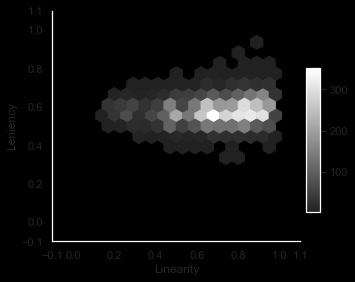

In [9]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    plt.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)

for file in csvFiles:
#     sns.set()
#     sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
#     x_var = getDimensionName(num_data['DIM X'][0])
#     y_var = getDimensionName(num_data['DIM Y'][0])
    x_var = "sdsal"
    y_var = "s"
#     with sns.axes_style("dark"):
    plt.figure(figsize=(30, 30))
    fitness_figure = sns.PairGrid(num_data, y_vars=["Leniency"], x_vars=["Linearity"], height=4)
        #fitness_figure.map(plt.scatter);
        
        #fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(plt.hexbin, "Similarity", "Fitness");
#     fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
    #fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray", alpha=0.5)
    #plt.subplots_adjust(hspace=0.9, left=0.2, right=0.93)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    cbar_ax = fitness_figure.fig.add_axes([.95, .2, .05, .5])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
#     plt.gca().set_facecolor('xkcd:salmon')
    
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    fitness_figure.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    
#     fitness_figure.savefig('../../../../my-data/expressive-range/copy/nya/_LEN-LIN_' + dirName + ".png")
    fitness_figure.savefig(savePlotsDirectory + '/lenlin/'+ x_var + "_" + y_var + "_" + dirName +  ".png")

## Get a pair grid of all the dimensions in relation to the fitness in hexa ##

<ipython-input-10-70e3214aa7a9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


<Figure size 2160x2160 with 0 Axes>

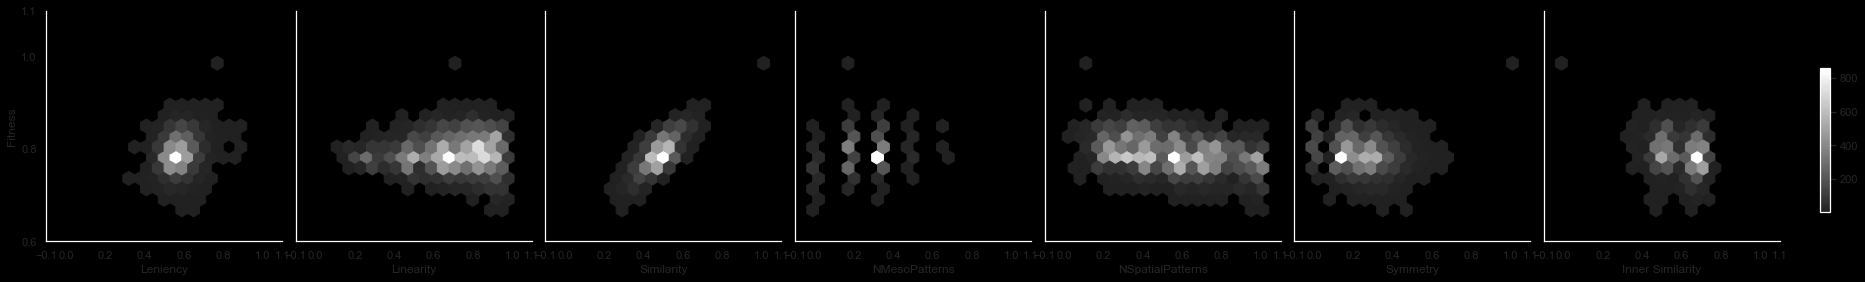

In [10]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = 0.6, 1.1
    plt.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax],mincnt=1, **kwargs)

for file in csvFiles:
#     sns.set()
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    x_var = getDimensionName(num_data['DIM X'][0])
    y_var = getDimensionName(num_data['DIM Y'][0])

    plt.figure(figsize=(30, 30))
    fitness_figure = sns.PairGrid(num_data, y_vars=["Fitness"], x_vars=["Leniency",
                                                                        "Linearity",
                                                                        "Similarity",
                                                                        "NMesoPatterns",
                                                                       "NSpatialPatterns",
                                                                       "Symmetry",
                                                                       "Inner Similarity"], height=4)
        #fitness_figure.map(plt.scatter);
        
        #fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(plt.hexbin, "Similarity", "Fitness");
    
    fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
    #fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray", alpha=0.5)
    #plt.subplots_adjust(hspace=0.9, left=0.2, right=0.93)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    cbar_ax = fitness_figure.fig.add_axes([.95, .2, .005, .5])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
    
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    fitness_figure.set(ylim=(0.6, 1.1), yticks=[0.6, 0.8, 1.0, 1.1]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
#     fitness_figure.savefig(savePlotsDirectory + '_TEST__' + dirName + ".png")
    fitness_figure.savefig(savePlotsDirectory + '/Fitness_HUE/' + x_var + "_" + y_var + "_" + dirName +  ".png")

TypeError: __init__() got an unexpected keyword argument 'ax'

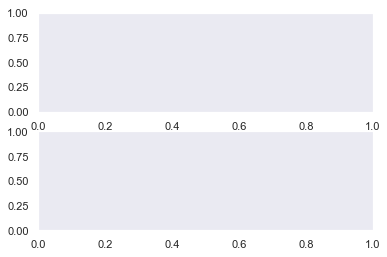

In [277]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = 0.0,1.0
    ymin, ymax = min_series[y.name], max_series[y.name]
    plt.hexbin(x, y, gridsize=10, cmap="inferno", extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)

for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    with sns.axes_style("dark"):
        #fig = plt.figure(figsize=(30, 30))
        fig, axs = plt.subplots(2)
        fitness_figure = sns.PairGrid(num_data, y_vars=["Fitness"], x_vars=["Leniency",
                                                                            "Linearity",
                                                                            "Similarity",
                                                                            "NMesoPatterns",
                                                                           "NSpatialPatterns",
                                                                           "Symmetry",
                                                                           "Inner Similarity"], height=4, ax=axs[0])
        
        fitness_figure_2 = sns.PairGrid(num_data, y_vars=["Fitness"], x_vars=["Leniency",
                                                                            "Linearity",
                                                                            "Similarity",
                                                                            "NMesoPatterns",
                                                                           "NSpatialPatterns",
                                                                           "Symmetry",
                                                                           "Inner Similarity"], height=4)
        #fitness_figure.map(plt.scatter);
        
        #fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(plt.hexbin, "Similarity", "Fitness");
    
    fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
    fitness_figure_2.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray", alpha=0.5)
    #plt.subplots_adjust(hspace=0.9, left=0.2, right=0.93)

    
    fig, axs = plt.subplots(2)
    fig.suptitle('Vertically stacked subplots')
    axs[0] = fitness_figure
    axs[1] = fitness_figure_2
    
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    cbar_ax = fitness_figure.fig.add_axes([.95, .2, .005, .5])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
    
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    axs[0].set(ylim=(0.6, 1.1), yticks=[0.6, 0.8, 1.0, 1.1]);
    axs[0].set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    axs[1].set(ylim=(0.6, 1.1), yticks=[0.6, 0.8, 1.0, 1.1]);
    axs[1].set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fig.savefig('../../../../my-data/expressive-range/copy/nya/_TEST__' + dirName + ".png")
    break;

## Get a pair grid of all the dimensions in relation to the fitness in scatter plot!##

C:\program-files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<Figure size 2160x2160 with 0 Axes>

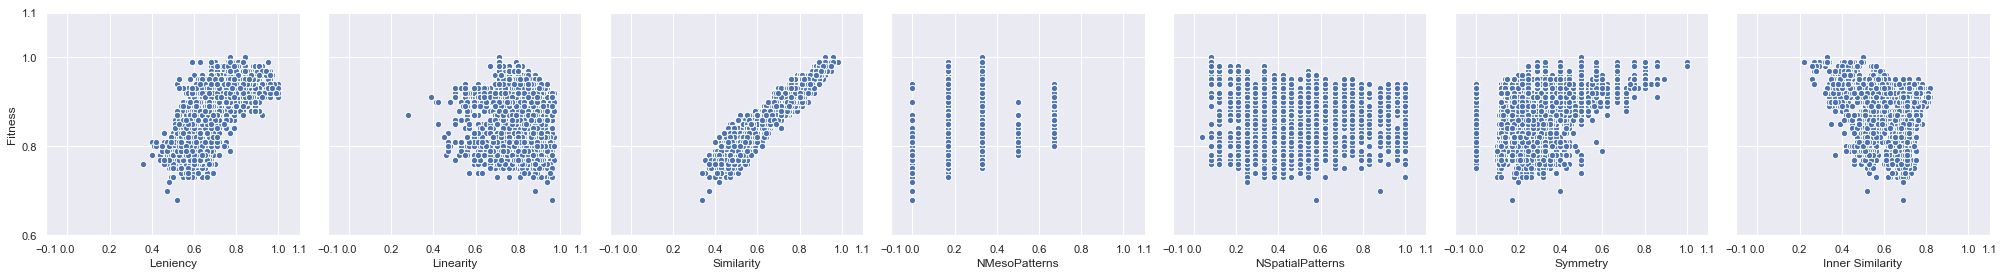

In [355]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    
    plt.figure(figsize=(30, 30))
    fitness_figure = sns.PairGrid(num_data, y_vars=["Fitness"], x_vars=["Leniency",
                                                                        "Linearity",
                                                                        "Similarity",
                                                                        "NMesoPatterns",
                                                                       "NSpatialPatterns",
                                                                       "Symmetry",
                                                                       "Inner Similarity"], height=4)#, hue="Type")
    #fitness_figure.map(plt.scatter);
    fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    fitness_figure.set(ylim=(0.6, 1.1), yticks=[0.6, 0.8, 1.0, 1.1]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fitness_figure.savefig(savePlotsDirectory + dirName + "___.png")    

## Get a pair plot in hexagrid of all the attributes related to each other ##

<ipython-input-11-8ab09398b42c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


<Figure size 2160x2160 with 0 Axes>

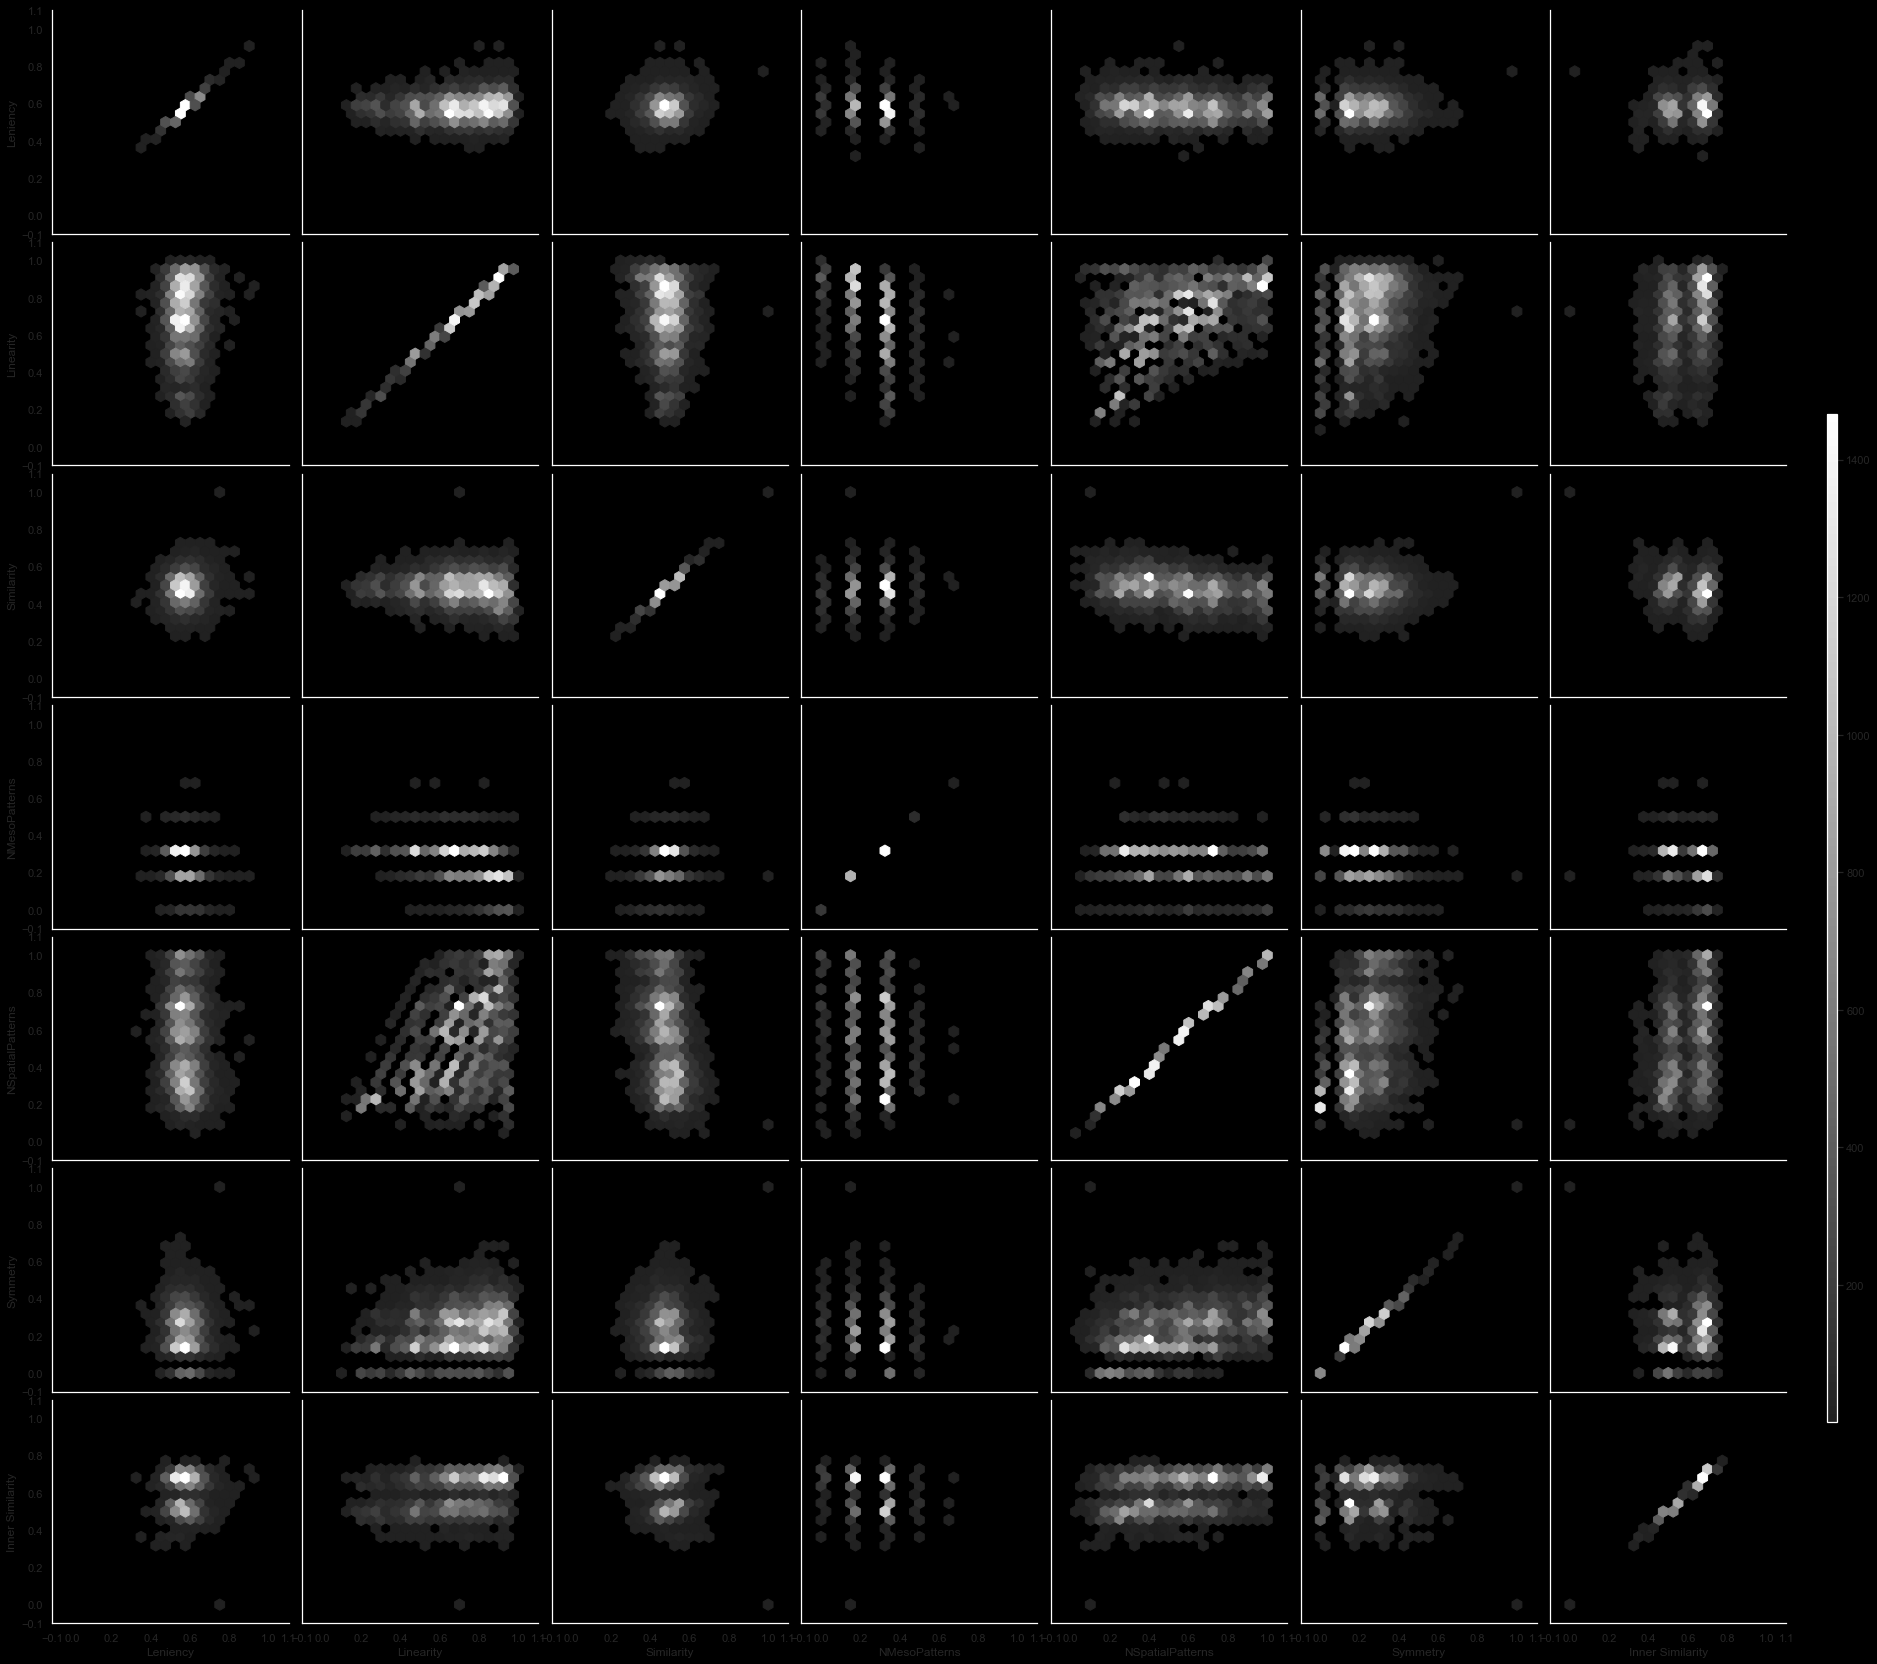

In [11]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = 0.0,1.0
    ymin, ymax = 0.0, 1.0
    plt.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)

for file in csvFiles:
#     sns.set()
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data = num_data.drop(columns=['Fitness'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    plt.figure(figsize=(30, 30))
    fitness_figure = sns.PairGrid(num_data, y_vars=["Leniency",
                                                                        "Linearity",
                                                                        "Similarity",
                                                                        "NMesoPatterns",
                                                                       "NSpatialPatterns",
                                                                       "Symmetry",
                                                                       "Inner Similarity"], x_vars=["Leniency",
                                                                        "Linearity",
                                                                        "Similarity",
                                                                        "NMesoPatterns",
                                                                       "NSpatialPatterns",
                                                                       "Symmetry",
                                                                       "Inner Similarity"], height=4)
        #fitness_figure.map(plt.scatter);
        
        #fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(plt.hexbin, "Similarity", "Fitness");
    
    fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
    #fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray", alpha=0.5)
    #plt.subplots_adjust(hspace=0.9, left=0.2, right=0.93)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    cbar_ax = fitness_figure.fig.add_axes([.95, .2, .005, .5])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
    
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    fitness_figure.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fitness_figure.savefig(savePlotsDirectory + '_FULL_UF_' + dirName + ".png")

## Get a pair plot in hexagrid of all the attributes related to each other except the attributes of the tested dimensions ##

### MODE chooses what is created and saved ###

0. all
1. all but dims
2. all but dims and fitness
3. only tested dims

<ipython-input-12-60b9bd309f08>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


ValueError: list.remove(x): x not in list

<Figure size 2160x2160 with 0 Axes>

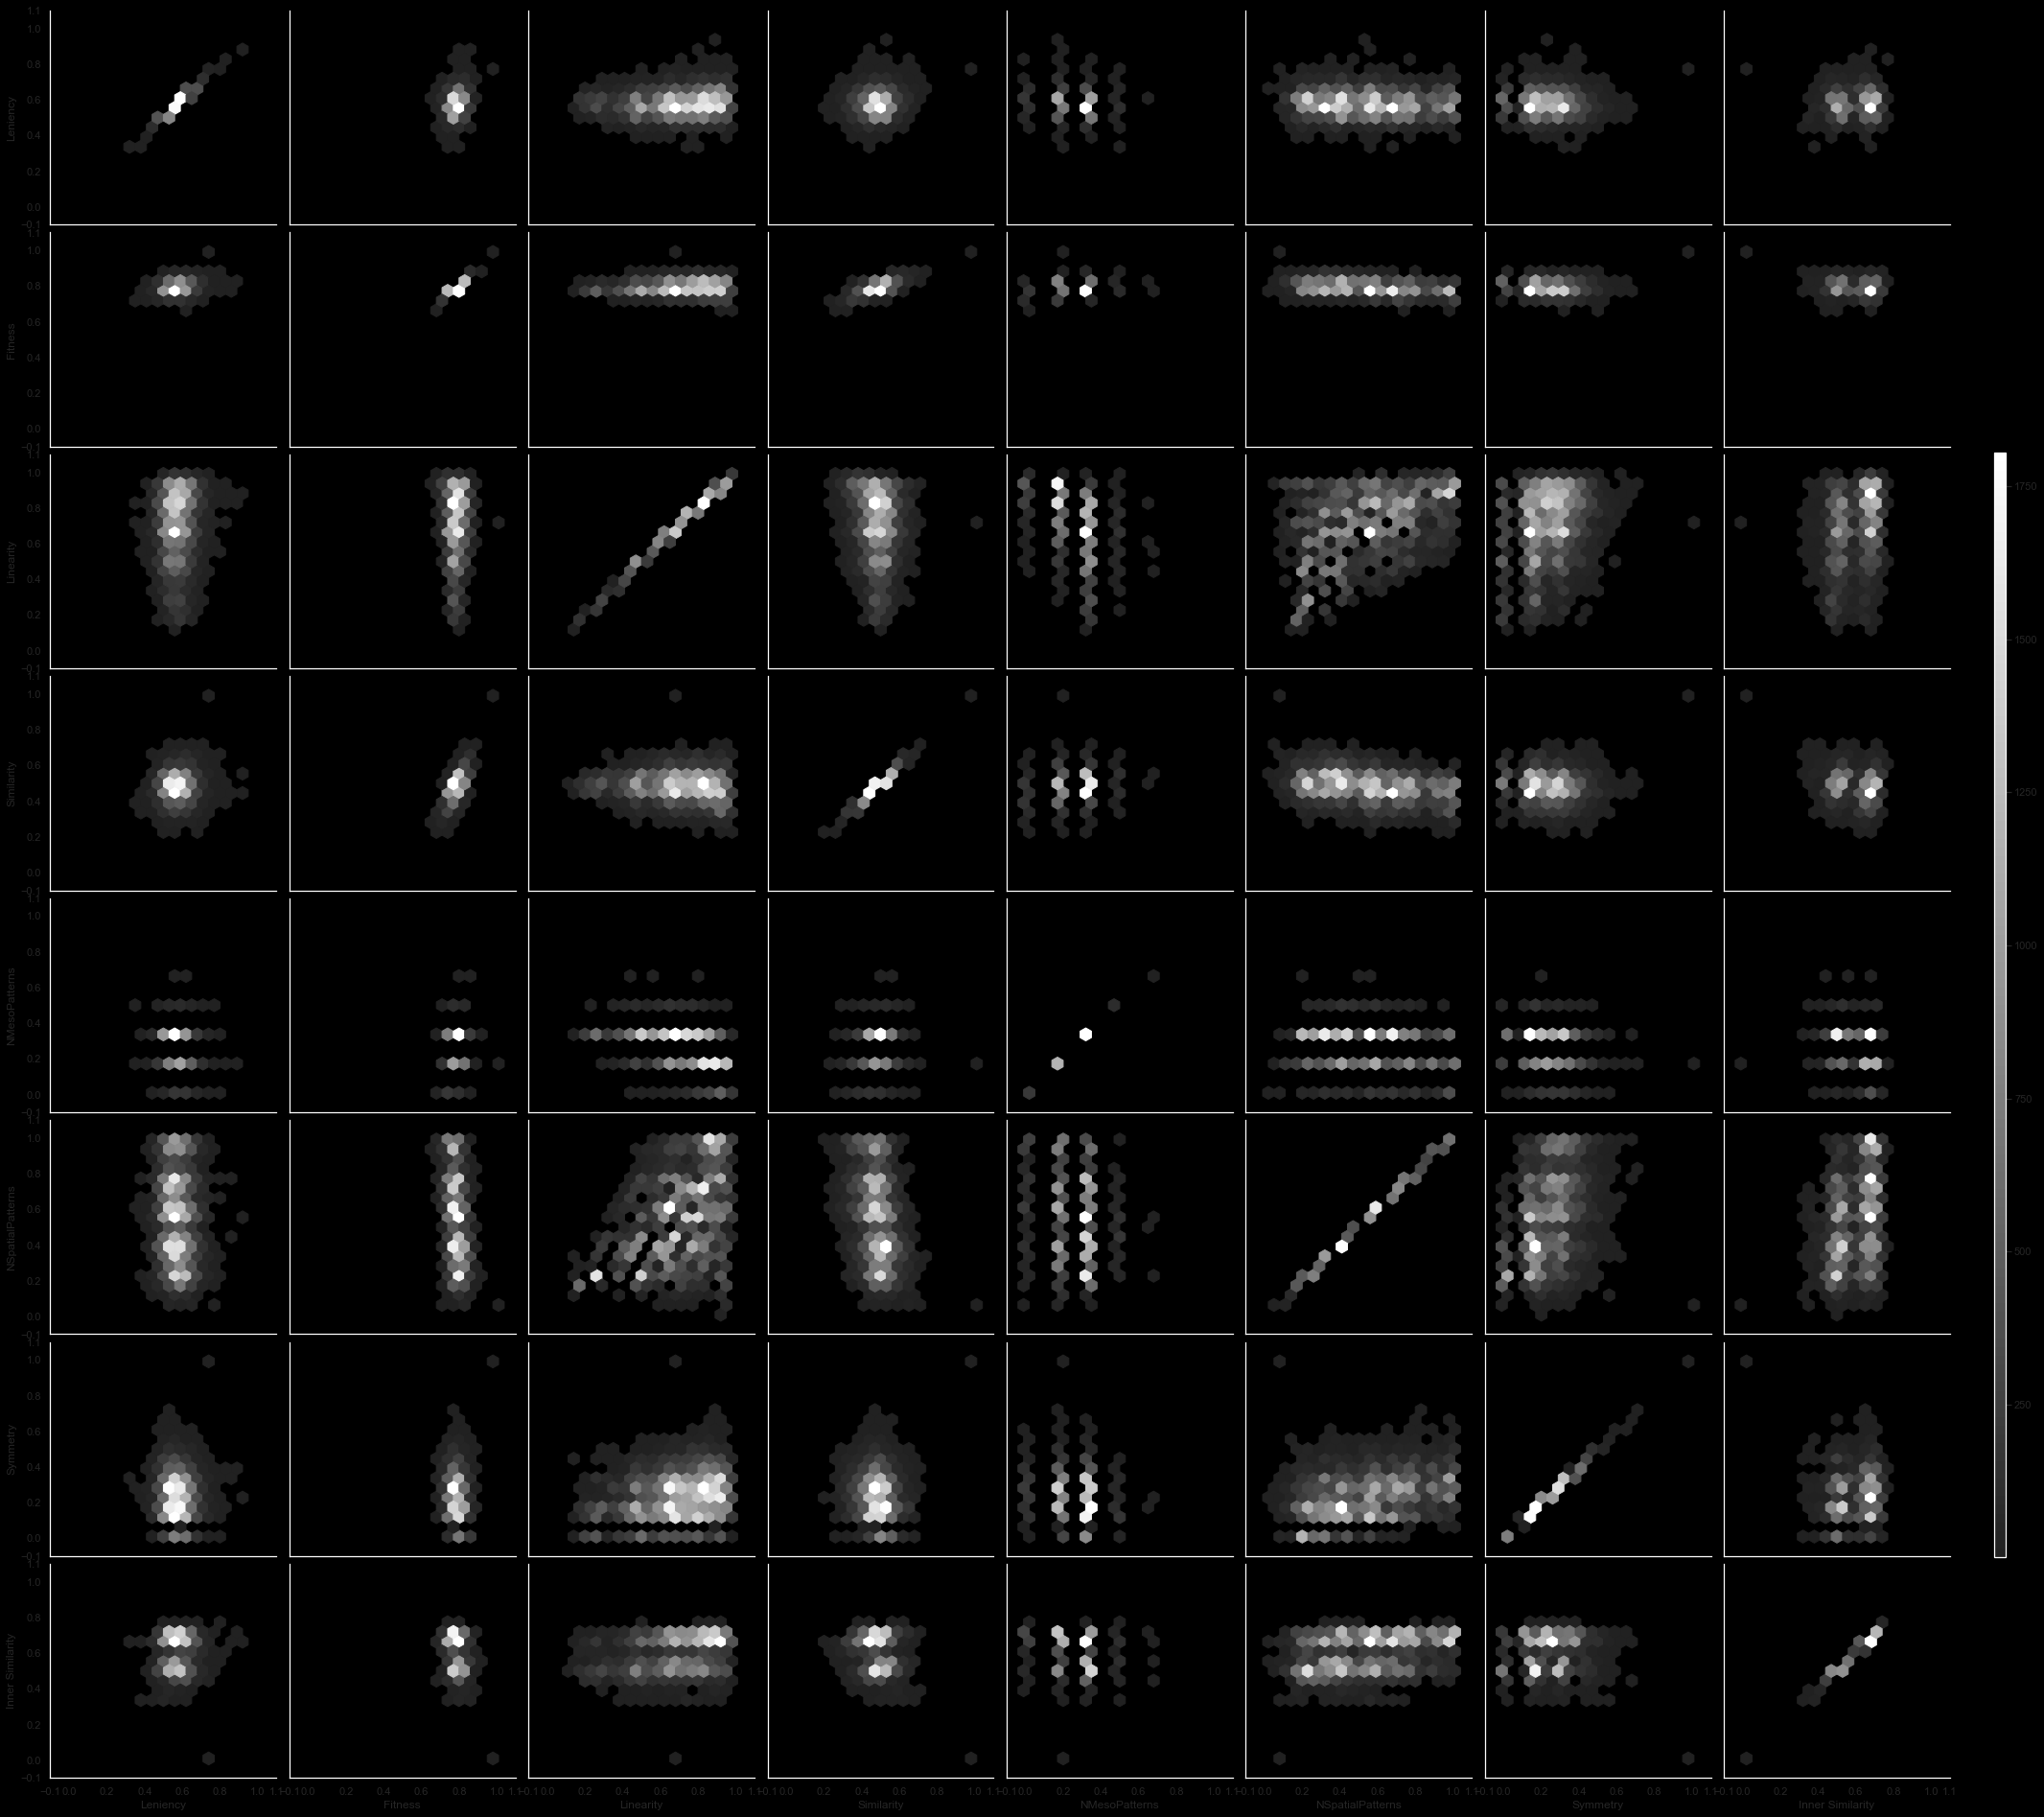

In [12]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    plt.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax],mincnt=1, **kwargs)
    
def getDimensionName(rawDim):
    switcher = {
        "LENIENCY":"Leniency",
        "INNER_SIMILARITY":"Inner Similarity",
        "SYMMETRY":"Symmetry",
        "SIMILARITY":"Similarity",
        "LINEARITY":"Linearity",
        "NUMBER_MESO_PATTERN":"NMesoPatterns",
        "NUMBER_PATTERNS":"NSpatialPatterns"
    }
    return switcher.get(rawDim)

#if 0 --> All but dims
#if 1 --> All but dims and fitness
#if 2 --> only dims
#mode = 2

for file in csvFiles:
    for mode in range(0,4):
#         sns.set()
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        dirName = file.split(".")[0]

        #read the csv, remove every row that have a missing value (i.e. NaN), round the floats, and limit values
        num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]

        filename_dims = dirName.split("-")
              
        if not mode == 0:
            testVars.remove(getDimensionName(filename_dims[1]))
            testVars.remove(getDimensionName(filename_dims[2]))

        if mode == 2 :
            testVars.remove("Fitness")

#         with sns.axes_style("dark"):
        plt.figure(figsize=(30, 30))

        if mode == 3 :
            fitness_figure = sns.PairGrid(num_data, y_vars=getDimensionName(filename_dims[2]), x_vars=getDimensionName(filename_dims[1]), height=4)
        else :
            fitness_figure = sns.PairGrid(num_data, y_vars=testVars, x_vars=testVars, height=4)

        fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
        plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible

        if mode == 3 :
            cbar_ax = fitness_figure.fig.add_axes([.97, .2, .05, .5])  # x, y, width, height
        else :
            cbar_ax = fitness_figure.fig.add_axes([.95, .2, .005, .5])  # x, y, width, height

        plt.colorbar(cax=cbar_ax)

        #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
        fitness_figure.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
        fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
        
        if mode == 0 :
            fitness_figure.savefig(savePlotsDirectory + '_PAIR__' + dirName + ".png")
        elif mode == 1 :
            fitness_figure.savefig(savePlotsDirectory + '_PAIR__NODIM_' + dirName + ".png")
        elif mode == 2 :
            fitness_figure.savefig(savePlotsDirectory + '_PAIR__UF_' + dirName + ".png")
        else :
            fitness_figure.savefig(savePlotsDirectory + '_CLASSIC__' + dirName + ".png")

#### Fast way of creating folders to save the next files ####

In [357]:
for file in csvFiles:
    dirName = file.split(".")[0]
    filename_dims = dirName.split("-")
    if not path.exists(savePlotsDirectory + filename_dims[1] + '_' + filename_dims[2]):
        os.makedirs(savePlotsDirectory + filename_dims[1] + '_' + filename_dims[2])

## Create expressive range per file of each dimension pair ##

<ipython-input-14-1b6ac42cc9df>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


['custom', 'unique', 'overtime_67aed84c', '574c', '4183', '8385', '72e3ee158b0d']


FileNotFoundError: [Errno 2] No such file or directory: 'D:/phd/current-research/MAP-ELITEs/ucb-elites/Experiment-1/unique_overtime_67aed84c/__X-Leniency-Y-Fitness.png'

<Figure size 2160x2160 with 0 Axes>

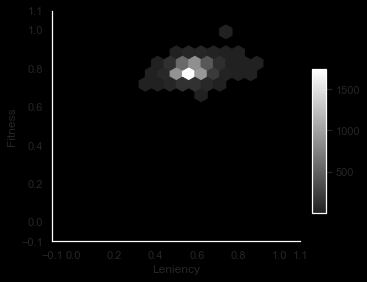

In [14]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    
    plt.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax],mincnt=1, **kwargs)

for file in csvFiles:

#     sns.set()
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    dirName = file.split(".")[0]

    #read the csv, remove every row that have a missing value (i.e. NaN), round the floats, and limit values
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

    testVars = ["Leniency",
                "Fitness",
                "Linearity",
                "Similarity",
                "NMesoPatterns",
                "NSpatialPatterns",
                "Symmetry",
                "Inner Similarity"
               ]
    filename_dims = dirName.split("-")
    print(filename_dims)
    #Create pairs 
    for i in range(0,8):
        for j in range(i,8):
            
            if i == j:
                continue

#             with sns.axes_style("dark"):
            plt.figure(figsize=(30, 30))
            pair_dimensions_expr = sns.PairGrid(num_data, y_vars=testVars[j], x_vars=testVars[i], height=4)
        
            #Uncomment and comment hexbin to get the data in scatter plot, specifically necessary to know
            #Where the main room is situated
#             pair_dimensions_expr = pair_dimensions_expr.map(plt.scatter, color="orange", edgecolor="w", s=40)
            pair_dimensions_expr.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
            
            plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
            cbar_ax = pair_dimensions_expr.fig.add_axes([.97, .2, .05, .5])  # x, y, width, height
            plt.colorbar(cax=cbar_ax)

            #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
            pair_dimensions_expr.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
            pair_dimensions_expr.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);

            pair_dimensions_expr.savefig(savePlotsDirectory  
                                         + filename_dims[1] + '_' + filename_dims[2] + '/__' 
                                         + "X-" + testVars[i]+ "-Y-" + testVars[j] + ".png")
            
#             pair_dimensions_expr.savefig(savePlotsDirectory
#                                          + "X-" + testVars[i]+ "-Y-" + testVars[j] + ".png")

C:\program-files\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\program-files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 2160x2160 with 0 Axes>

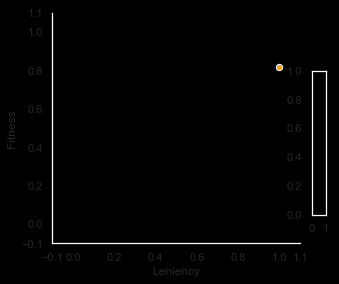

<Figure size 2160x2160 with 0 Axes>

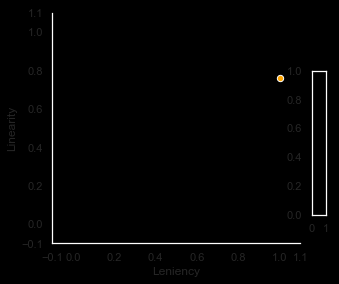

<Figure size 2160x2160 with 0 Axes>

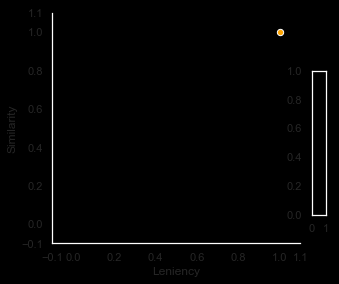

<Figure size 2160x2160 with 0 Axes>

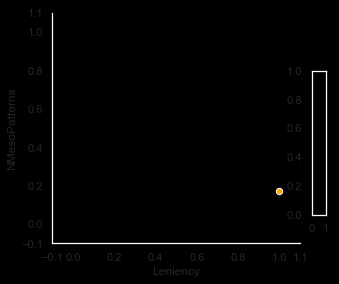

<Figure size 2160x2160 with 0 Axes>

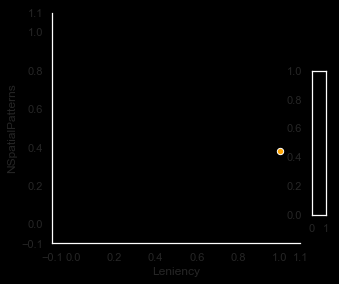

<Figure size 2160x2160 with 0 Axes>

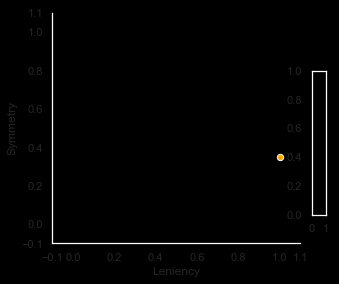

<Figure size 2160x2160 with 0 Axes>

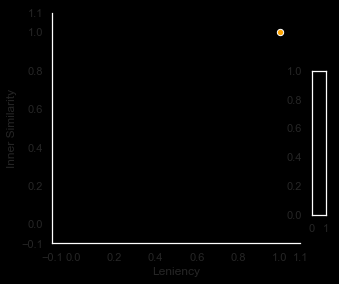

<Figure size 2160x2160 with 0 Axes>

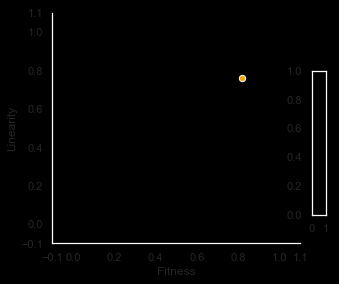

<Figure size 2160x2160 with 0 Axes>

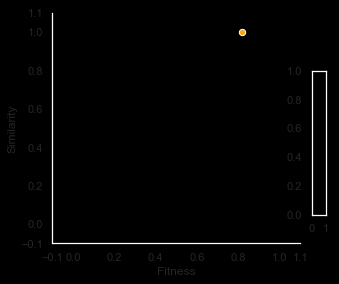

<Figure size 2160x2160 with 0 Axes>

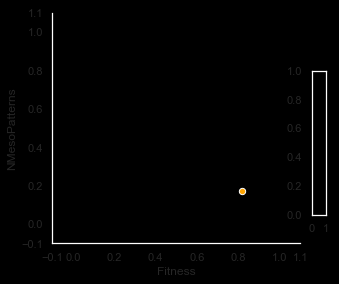

<Figure size 2160x2160 with 0 Axes>

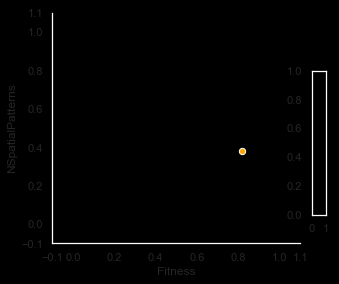

<Figure size 2160x2160 with 0 Axes>

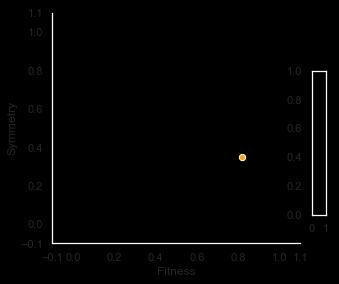

<Figure size 2160x2160 with 0 Axes>

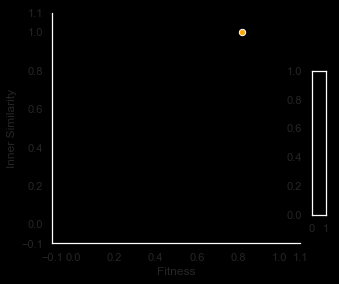

<Figure size 2160x2160 with 0 Axes>

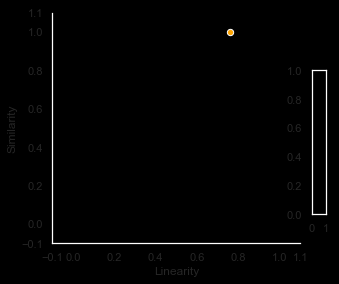

<Figure size 2160x2160 with 0 Axes>

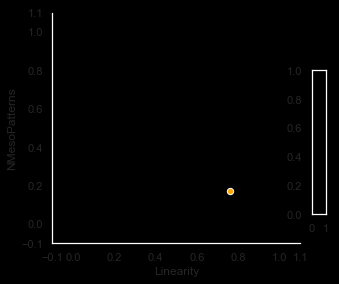

<Figure size 2160x2160 with 0 Axes>

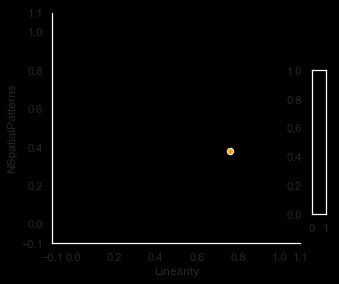

<Figure size 2160x2160 with 0 Axes>

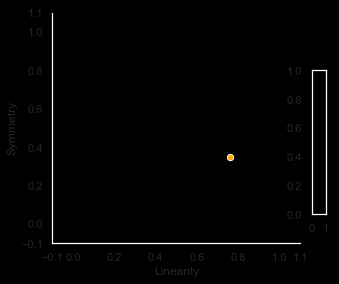

<Figure size 2160x2160 with 0 Axes>

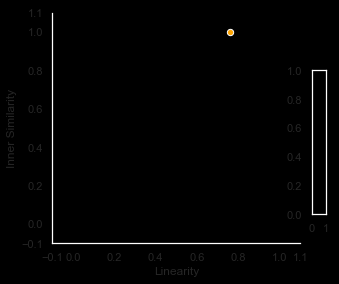

<Figure size 2160x2160 with 0 Axes>

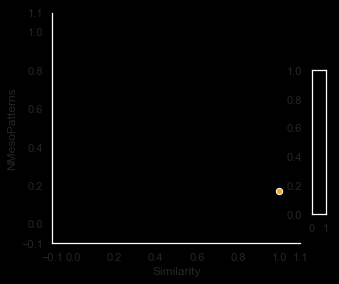

<Figure size 2160x2160 with 0 Axes>

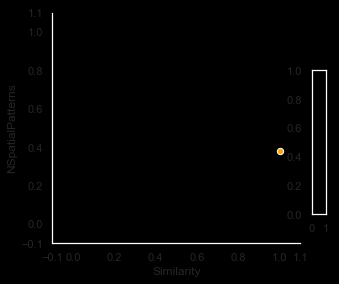

<Figure size 2160x2160 with 0 Axes>

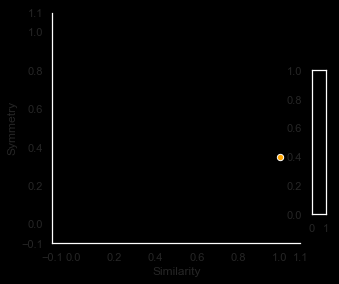

<Figure size 2160x2160 with 0 Axes>

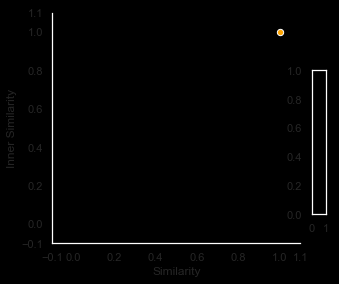

<Figure size 2160x2160 with 0 Axes>

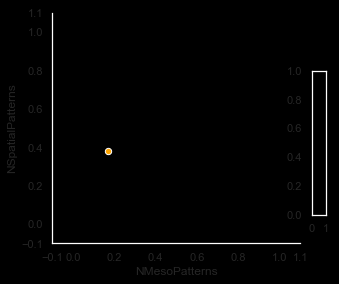

<Figure size 2160x2160 with 0 Axes>

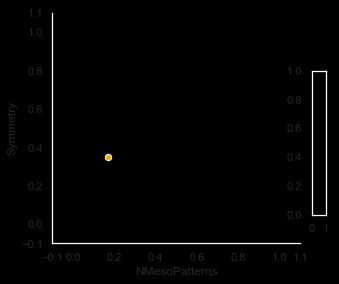

<Figure size 2160x2160 with 0 Axes>

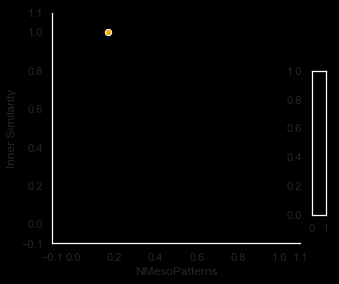

<Figure size 2160x2160 with 0 Axes>

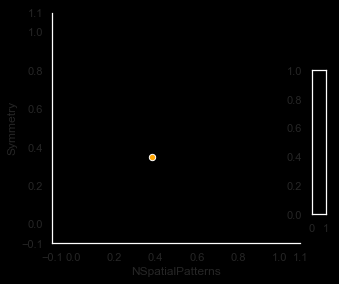

<Figure size 2160x2160 with 0 Axes>

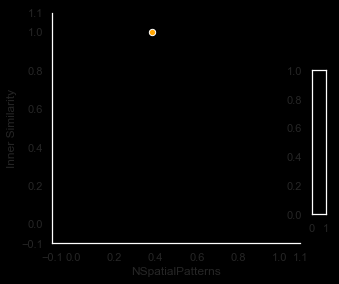

<Figure size 2160x2160 with 0 Axes>

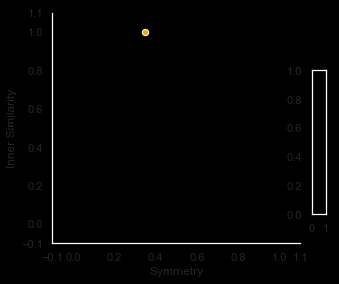

In [348]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    
    plt.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax],mincnt=1, **kwargs)

for file in csvFiles:

#     sns.set()
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    dirName = file.split(".")[0]

    #read the csv, remove every row that have a missing value (i.e. NaN), round the floats, and limit values
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

    testVars = ["Leniency",
                "Fitness",
                "Linearity",
                "Similarity",
                "NMesoPatterns",
                "NSpatialPatterns",
                "Symmetry",
                "Inner Similarity"
               ]
    filename_dims = dirName.split("-")
    
    #Create pairs 
    for i in range(0,8):
        for j in range(i,8):
            
            if i == j:
                continue

#             with sns.axes_style("dark"):
            plt.figure(figsize=(30, 30))
            pair_dimensions_expr = sns.PairGrid(num_data, y_vars=testVars[j], x_vars=testVars[i], height=4)
            pair_dimensions_expr = pair_dimensions_expr.map(plt.scatter, color="orange", edgecolor="w", s=40)
#             pair_dimensions_expr.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray")
            plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
            cbar_ax = pair_dimensions_expr.fig.add_axes([.97, .2, .05, .5])  # x, y, width, height

#             plt.colorbar(cax=cbar_ax)

            #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
            pair_dimensions_expr.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
            pair_dimensions_expr.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);

#             pair_dimensions_expr.savefig('../../../../my-data/expressive-range/copy/nya/' 
#                                          + filename_dims[1] + '_' + filename_dims[2] + '/__' 
#                                          + "X-" + testVars[i]+ "-Y-" + testVars[j] + ".png")
            
            pair_dimensions_expr.savefig(savePlotsDirectory 
                                         + "X-" + testVars[i]+ "-Y-" + testVars[j] + ".png")

In [ ]:
os.makedirs('../../../../my-data/expressive-range/BIG_GRID')  
os.makedirs('../../../../my-data/expressive-range/MED_GRID')  
os.makedirs('../../../../my-data/expressive-range/SMALL_GRID')  
os.makedirs('../../../../my-data/expressive-range/Fitness_HUE')  
os.makedirs('../../../../my-data/expressive-range/pair_plot')  
os.makedirs('../../../../my-data/expressive-range/basic_plot')  
os.makedirs('../../../../my-data/expressive-range/basic_plot_numbers') 

Creates a heatmap plot with hexagons (Big grid, small hex!)

In [ ]:
for file in csvFiles:
    sns.set(style="ticks")
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)

    #BIG GRID

    joint_kws=dict(gridsize=20)
    expresive_range_plot = sns.jointplot(data=num_data, x="Linearity", y="Leniency", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

    #FOR THE COLOR BAR TO THE RIGHT

    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
    cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
    # expresive_range_plot.ax_marg_x.set_xlim(0.0, 1.0)
    # expresive_range_plot.ax_marg_y.set_ylim(0.0, 1.0)
    expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    # expresive_range_plot.ax_joint.legend_.remove()
    
    expresive_range_plot.savefig('../../../../my-data/expressive-range/' + dirName + "/BIG_GRID/output.png")
    expresive_range_plot.savefig('../../../../my-data/expressive-range/BIG_GRID/' + dirName + '.png')

Creates a heatmap plot with hexagons (medium grid, medium hex!)

In [ ]:
for file in csvFiles:
    sns.set(style="ticks")
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)

    #Medium GRID

    joint_kws=dict(gridsize=15)
    expresive_range_plot = sns.jointplot(data=num_data, x="Linearity", y="Leniency", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

    #FOR THE COLOR BAR TO THE RIGHT

    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
    cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
    # expresive_range_plot.ax_marg_x.set_xlim(0.0, 1.0)
    # expresive_range_plot.ax_marg_y.set_ylim(0.0, 1.0)
    expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    # expresive_range_plot.ax_joint.legend_.remove()
    
    expresive_range_plot.savefig('../../../../my-data/expressive-range/' + dirName + "/MED_GRID/output.png")
    expresive_range_plot.savefig('../../../../my-data/expressive-range/MED_GRID/' + dirName + '.png')

Creates a heatmap plot with hexagons (Small grid, Big hex!)

In [ ]:
for file in csvFiles:
    sns.set(style="ticks")
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)

    #Small GRID

    joint_kws=dict(gridsize=10)
    expresive_range_plot = sns.jointplot(data=num_data, x="Linearity", y="Leniency", kind="hex",cmap="gray", size=10, joint_kws= joint_kws)

    #FOR THE COLOR BAR TO THE RIGHT

    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
    cbar_ax = expresive_range_plot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
    # expresive_range_plot.ax_marg_x.set_xlim(0.0, 1.0)
    # expresive_range_plot.ax_marg_y.set_ylim(0.0, 1.0)
    expresive_range_plot.ax_marg_x.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    expresive_range_plot.ax_marg_y.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    # expresive_range_plot.ax_joint.legend_.remove()
    
    expresive_range_plot.savefig('../../../../my-data/expressive-range/' + dirName + "/SMALL_GRID/output.png")
    expresive_range_plot.savefig('../../../../my-data/expressive-range/SMALL_GRID/' + dirName + '.png')

Scatter plot with the HUE of the scatter points as the fitness

In [ ]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    
    plt.figure(figsize=(16, 16))
    #FOR THE COLOR BAR TO THE RIGHT
    joint_kws=dict(gridsize=15)
    expresive_range_plot = sns.scatterplot(x="Linearity", y="Leniency", hue="Fitness",palette="Set2", data=num_data, s=80)
    
#     figure.savefig('../../../../my-data/expressive-range/' + dirName + "/Fitness_HUE/output.png")
#     figure.savefig('../../../../my-data/expressive-range/Fitness_HUE/' + dirName + '.png')

Pairplot comparison of all the recorded variables

In [ ]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    
    plt.figure(figsize=(30, 30))
    expresive_range_plot = sns.pairplot(num_data)
    
    expresive_range_plot.savefig('../../../../my-data/expressive-range/' + dirName + "/pair_plot/output.png")
    expresive_range_plot.savefig('../../../../my-data/expressive-range/pair_plot/' + dirName + '.png')

Classic heatmap on gray

In [ ]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    
    num_data_extra = num_data.reset_index().pivot_table(values='Score', index=['Leniency'], columns='Linearity', aggfunc=np.sum)
    num_data_extra.sort_index(level=0, ascending=False, inplace=True)
    plt.figure(figsize=(16, 16))
    #cmap="RdBu_r"
    expresive_range_plot = sns.heatmap(num_data_extra, yticklabels=8, xticklabels=8,linewidths=0, cmap="gray", cbar_kws={'label': 'Rooms'})
    expresive_range_plot.set_facecolor('xkcd:black')
    
    figure = expresive_range_plot.get_figure()   
    
    figure.savefig('../../../../my-data/expressive-range/' + dirName + "/basic_plot/output_gray.png")
    figure.savefig('../../../../my-data/expressive-range/basic_plot/' + dirName + '_gray.png')

Classic heatmap on color

In [ ]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    
    num_data_extra = num_data.reset_index().pivot_table(values='Score', index=['Leniency'], columns='Linearity', aggfunc=np.sum)
    num_data_extra.sort_index(level=0, ascending=False, inplace=True)
    plt.figure(figsize=(16, 16))
    #cmap="RdBu_r"
    expresive_range_plot = sns.heatmap(num_data_extra, yticklabels=8, xticklabels=8,linewidths=0, cbar_kws={'label': 'Rooms'})
    expresive_range_plot.set_facecolor('xkcd:black')
    
    figure = expresive_range_plot.get_figure()   
    
    figure.savefig('../../../../my-data/expressive-range/' + dirName + "/basic_plot/output_color.png")
    figure.savefig('../../../../my-data/expressive-range/basic_plot/' + dirName + '_color.png')

Classic heatmap on gray with annotation of the amount of rooms per square

In [ ]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    
    num_data_extra = num_data.reset_index().pivot_table(values='Score', index=['Leniency'], columns='Linearity', aggfunc=np.sum)
    num_data_extra.sort_index(level=0, ascending=False, inplace=True)
    plt.figure(figsize=(30, 30))
    #cmap="RdBu_r"
    expresive_range_plot = sns.heatmap(num_data_extra, annot=True, yticklabels=8, xticklabels=8,linewidths=0, cmap="gray", cbar_kws={'label': 'Rooms'})
    expresive_range_plot.set_facecolor('xkcd:black')
    
    figure = expresive_range_plot.get_figure()
    
    figure.savefig('../../../../my-data/expressive-range/' + dirName + "/basic_plot_numbers/output_gray.png")
    figure.savefig('../../../../my-data/expressive-range/basic_plot_numbers/' + dirName + '_gray.png')

Classic heatmap on color with annotation of the amount of rooms per square

In [ ]:
for file in csvFiles:
    sns.set()
    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv('../../../../my-data/expressive-range/' + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    
    num_data_extra = num_data.reset_index().pivot_table(values='Score', index=['Leniency'], columns='Linearity', aggfunc=np.sum)
    num_data_extra.sort_index(level=0, ascending=False, inplace=True)
    plt.figure(figsize=(30, 30))
    #cmap="RdBu_r"
    expresive_range_plot = sns.heatmap(num_data_extra, annot=True, yticklabels=8, xticklabels=8,linewidths=0, cbar_kws={'label': 'Rooms'})
    expresive_range_plot.set_facecolor('xkcd:black')
    
    figure = expresive_range_plot.get_figure()   
    
    figure.savefig('../../../../my-data/expressive-range/' + dirName + "/basic_plot_numbers/output_color.png")
    figure.savefig('../../../../my-data/expressive-range/basic_plot_numbers/' + dirName + '_color.png')